# Applied Data Visualization – Homework 4
*https://www.dataviscourse.net/2024-applied/*


In this homework we will create custom maps using GeoPandas and Contextily. 

## Your Info and Submission Instructions

* *Names:* Jamin Willoughby, Elizabeth Mumby, Braden Fallon
* *Emails:* u1411876@utah.edu, 
* *UIDs:* u1411876, 


## Dependencies


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
import shutil

# Need for this homework
import geopandas as gpd
import contextily as ctx

plt.style.use('default')
# This next line tells jupyter to render the images inline
%matplotlib inline
import matplotlib_inline
# This renders your figures as vector graphics AND gives you an option to download a PDF too
matplotlib_inline.backend_inline.set_matplotlib_formats('svg', 'pdf')

In [2]:
# Define the chunk size
chunk_size = 20000000

# Read the first chunk of the file
chunk = pd.read_csv('steam_game_subset.zip', compression='zip', sep='\t', chunksize=chunk_size)

# Get the first chunk
df = next(chunk)

#Convert df into a pandas dataframe
df = pd.DataFrame(df)

#Remove personaname column and Title column
df = df.drop(columns=['personaname', 'Title'])

#Remove any rows with NaN or missing values in the user_loccountrycode column
df = df.dropna(subset=['user_loccountrycode'])

In [3]:
#Print number of rows in df
print(len(df))

#So we go from 20,000,000 rows to 13,272,739 rows. Now print the number of unique steamid
print(len(df['steamid'].unique()))

#So we have around 382,000 unique users. Now for each user, 

#List columns
print(df.columns)
df.head()

13272739
382165
Index(['steamid', 'appid', 'user_loccountrycode', 'number_of_friends',
       'number_of_groups', 'Genres'],
      dtype='object')


,steamid,appid,user_loccountrycode,number_of_friends,number_of_groups,Genres
26,76561197960265731,50,US,165,15,Action
27,76561197960265731,60,US,165,15,Action
28,76561197960265731,220,US,165,15,Action
29,76561197960265731,240,US,165,15,Action
30,76561197960265731,300,US,165,15,Action


In [4]:
df2 = df.groupby('steamid').agg(
    n_games=('appid', 'nunique'),
    n_genres=('Genres', 'nunique'),
    country=('user_loccountrycode', 'first'),
    number_of_friends=('number_of_friends', 'first'),
    number_of_groups=('number_of_groups', 'first')
).reset_index()

df2.head()

#Now we have a dataframe with the number of games, number of genres, country, number of friends, and number of groups for each user.

,steamid,n_games,n_genres,country,number_of_friends,number_of_groups
0,76561197960265731,34,18,US,165,15
1,76561197960265733,38,21,US,52,12
2,76561197960265735,13,3,US,12,8
3,76561197960265738,41,20,US,81,18
4,76561197960265740,41,21,AU,63,26


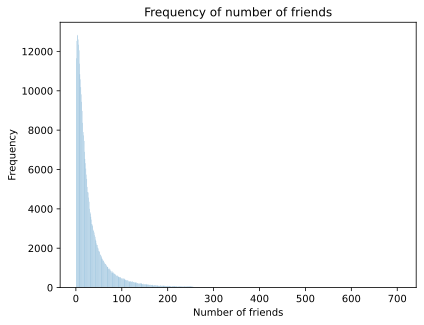

In [19]:
#Let's plot frequency of number of friends
df2['number_of_friends'].plot.hist(bins=2000)

plt.xlabel('Number of friends')
plt.ylabel('Frequency')
plt.title('Frequency of number of friends')
plt.show()

In [24]:
#Create a dataframe in which the average number of friends per user is calculated for each country
df3 = df2.groupby('country').agg(
    avg_friends=('number_of_friends', 'mean')
).reset_index()

#Read the world.json file
world = gpd.read_file('./world.json')

# Set the display option to show all rows
pd.set_option('display.max_rows', None)

#Print the entire 'country' column
print(df3['country'])





0      AD
1      AE
2      AF
3      AG
4      AI
5      AL
6      AM
7      AN
8      AO
9      AQ
10     AR
11     AS
12     AT
13     AU
14     AW
15     AZ
16     BA
17     BB
18     BD
19     BE
20     BF
21     BG
22     BH
23     BI
24     BJ
25     BM
26     BN
27     BO
28     BR
29     BS
30     BT
31     BV
32     BW
33     BY
34     BZ
35     CA
36     CC
37     CF
38     CG
39     CH
40     CI
41     CK
42     CL
43     CM
44     CN
45     CO
46     CR
47     CU
48     CV
49     CX
50     CY
51     CZ
52     DE
53     DJ
54     DK
55     DM
56     DO
57     DZ
58     EC
59     EE
60     EG
61     EH
62     ER
63     ES
64     ET
65     FI
66     FJ
67     FK
68     FM
69     FO
70     FR
71     FX
72     GA
73     GB
74     GD
75     GE
76     GF
77     GH
78     GI
79     GL
80     GM
81     GN
82     GP
83     GQ
84     GR
85     GT
86     GU
87     GW
88     GY
89     HK
90     HM
91     HN
92     HR
93     HT
94     HU
95     ID
96     IE
97     IL
98     IN
99     IO
